<a href="https://colab.research.google.com/github/ser-art/RAE-vs-AE/blob/master/AE_vs_RAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import regularizers
from keras.callbacks import TensorBoard

import tqdm
import tensorflow as tf

# Build and fit models


## Some helpful functions 

In [0]:
from keras.losses import binary_crossentropy, mean_squared_error
from keras import backend as K

def L(X, X_, t):
  if t == 'binary':
    return binary_crossentropy(X, X_)
  return mean_squared_error(X, X_)

def R(X):
  return K.dot(X, K.transpose(X))

def tau(X, t):
  return tf.where(X < t, X, tf.zeros(tf.shape(X)))

def rae_loss(alpha, t, L_type='binary'):
  def rae(y_true, y_pred):
    return (1 - alpha)*L(y_true, y_pred, L_type) + alpha*L(tau(R(y_true), t), tau(R(y_pred), t), L_type)
  return rae

In [0]:
def plot_digits(n, X, decoded_X):
    plt.figure(figsize=(2*n, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Simple AE

In [0]:
from keras.datasets import mnist as fmnist # import fashion mnist dataset 

In [0]:
(X_train, _), (X_test, _) = fmnist.load_data()

In [0]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [78]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [0]:
inputs = Input(shape=(28*28,))
reg = 1e-5

encoded = Dense(units=128, activation='relu')(inputs)

encoded = Dense(units=64, activation='relu')(encoded)

encoded = Dense(units=2, activation='relu')(encoded)

decoded = Dense(units=64, activation='relu')(encoded)

decoded = Dense(units=128, activation='relu')(decoded)

decoded = Dense(units=28*28, activation='sigmoid')(decoded)

In [0]:
autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

In [83]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_54 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 130       
_________________________________________________________________
dense_56 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_57 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_58 (Dense)             (None, 784)               101136    
Total para

## RAE autoencoder (when alpha equals 0 then is just simple AE - first iteration)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.2555 - val_loss: 0.2205
Epoch 2/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.2137 - val_loss: 0.2073
Epoch 3/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.2031 - val_loss: 0.1995
Epoch 4/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.1973 - val_loss: 0.1954
Epoch 5/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1933 - val_loss: 0.1917
Epoch 6/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1902 - val_loss: 0.1884
Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.1876 - val_loss: 0.1867
Epoch 8/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.1857 - val_loss: 0.1854
Epoch 9/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.1839 - val_

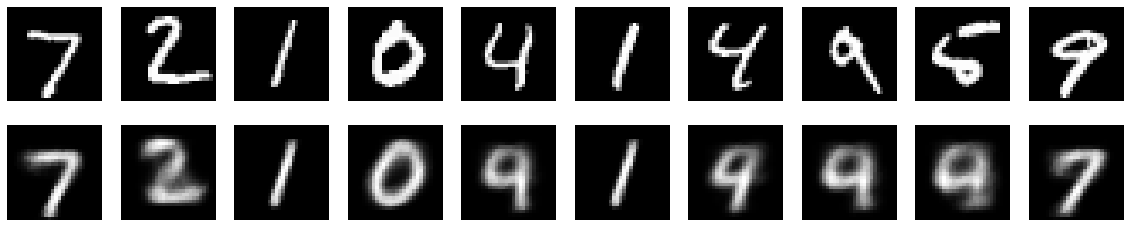

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 325us/step - loss: 0.3326 - val_loss: 0.3437
Epoch 2/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.3301 - val_loss: 0.3428
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.3271 - val_loss: 0.3373
Epoch 4/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.3235 - val_loss: 0.3217
Epoch 5/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.3207 - val_loss: 0.3262
Epoch 6/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.3191 - val_loss: 0.3162
Epoch 7/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.3161 - val_loss: 0.3302
Epoch 8/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.3138 - val_loss: 0.3178
Epoch 9/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.3125 - va

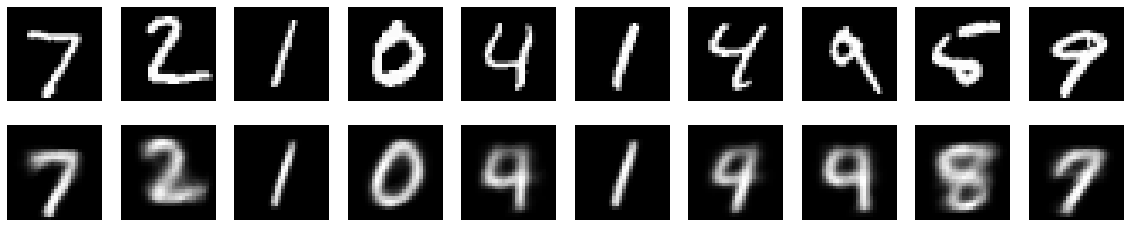

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 326us/step - loss: 0.4441 - val_loss: 0.4626
Epoch 2/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.4421 - val_loss: 0.4536
Epoch 3/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.4403 - val_loss: 0.4060
Epoch 4/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.4343 - val_loss: 0.4586
Epoch 5/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.4338 - val_loss: 0.4514
Epoch 6/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.4339 - val_loss: 0.4330
Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.4323 - val_loss: 0.4354
Epoch 8/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.4299 - val_loss: 0.4358
Epoch 9/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.4301 - va

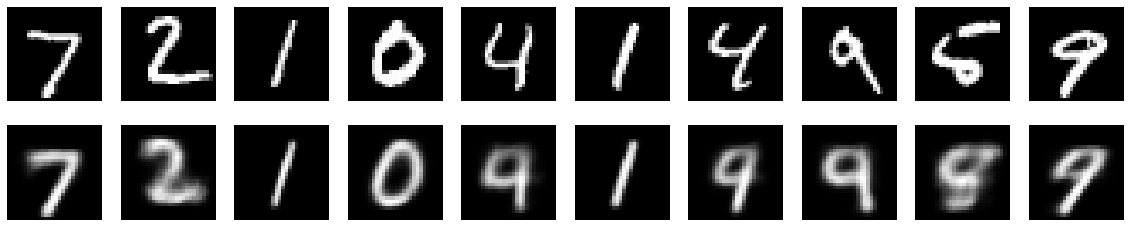

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.5541 - val_loss: 0.5555
Epoch 2/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.5525 - val_loss: 0.5477
Epoch 3/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.5507 - val_loss: 0.5766
Epoch 4/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.5497 - val_loss: 0.5700
Epoch 5/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.5479 - val_loss: 0.5946
Epoch 6/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.5478 - val_loss: 0.4829
Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.5432 - val_loss: 0.5795
Epoch 8/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.5439 - val_loss: 0.5747
Epoch 9/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.5434 - va

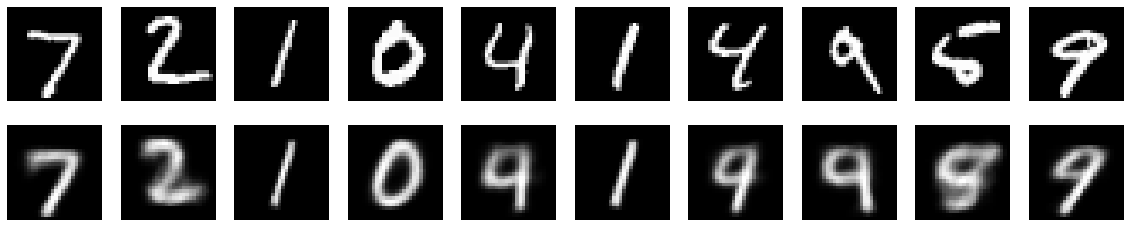

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.6609 - val_loss: 0.7090
Epoch 2/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.6660 - val_loss: 0.6507
Epoch 3/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.6625 - val_loss: 0.6463
Epoch 4/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.6621 - val_loss: 0.7400
Epoch 5/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.6581 - val_loss: 0.6934
Epoch 6/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.6676 - val_loss: 0.6393
Epoch 7/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.6615 - val_loss: 0.7107
Epoch 8/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.6630 - val_loss: 0.6735
Epoch 9/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.6586 - va

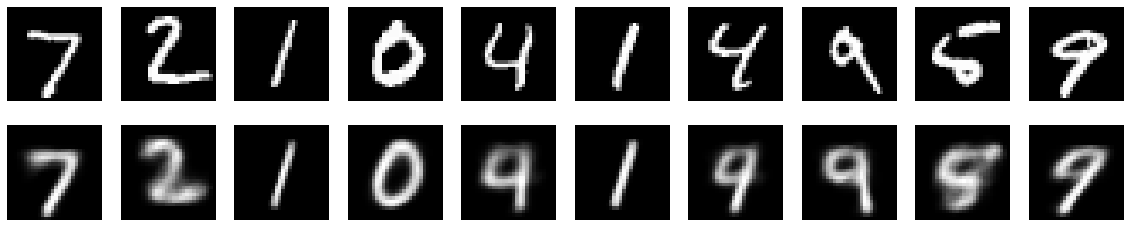

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 345us/step - loss: 0.7796 - val_loss: 0.7878
Epoch 2/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.7779 - val_loss: 0.7514
Epoch 3/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.7729 - val_loss: 0.7961
Epoch 4/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.7746 - val_loss: 0.7335
Epoch 5/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.7756 - val_loss: 0.8350
Epoch 6/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.7767 - val_loss: 0.7953
Epoch 7/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.7726 - val_loss: 0.8156
Epoch 8/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.7773 - val_loss: 0.8796
Epoch 9/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.7714 - va

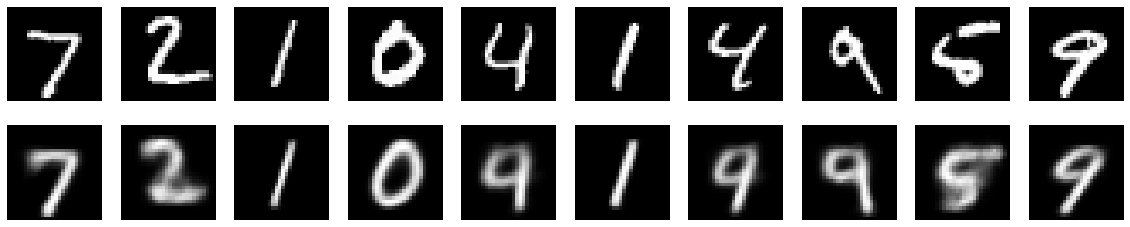

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.8967 - val_loss: 0.9378
Epoch 2/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.8877 - val_loss: 0.9787
Epoch 3/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.8896 - val_loss: 0.9105
Epoch 4/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.8905 - val_loss: 0.9360
Epoch 5/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.8858 - val_loss: 0.9621
Epoch 6/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.8844 - val_loss: 1.0038
Epoch 7/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.8839 - val_loss: 0.9111
Epoch 8/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.8871 - val_loss: 0.8805
Epoch 9/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.8873 - va

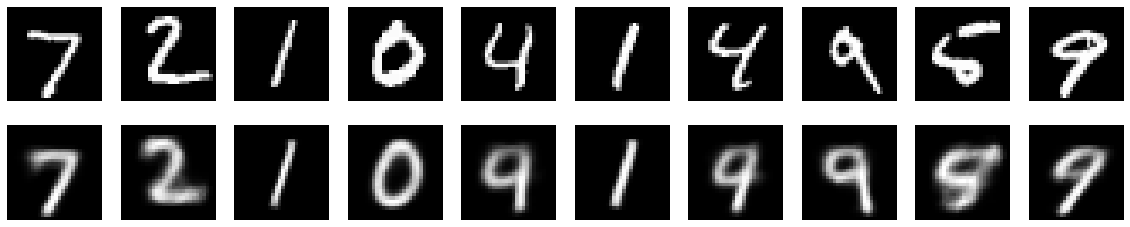

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 371us/step - loss: 1.0081 - val_loss: 1.1011
Epoch 2/10
60000/60000 [==============================] - 13s 218us/step - loss: 1.0021 - val_loss: 1.0086
Epoch 3/10
60000/60000 [==============================] - 13s 218us/step - loss: 1.0013 - val_loss: 1.0116
Epoch 4/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.9967 - val_loss: 1.0476
Epoch 5/10
60000/60000 [==============================] - 14s 226us/step - loss: 1.0002 - val_loss: 1.1521
Epoch 6/10
60000/60000 [==============================] - 13s 225us/step - loss: 1.0072 - val_loss: 1.0644
Epoch 7/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.9979 - val_loss: 1.1284
Epoch 8/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.9990 - val_loss: 1.1431
Epoch 9/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.9993 - va

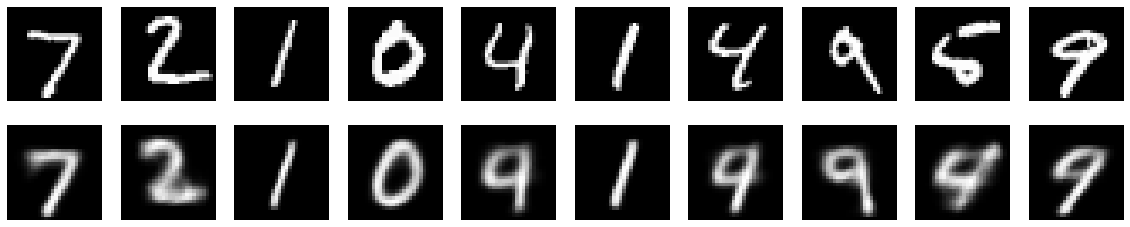

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 433us/step - loss: 1.1166 - val_loss: 1.1123
Epoch 2/10
60000/60000 [==============================] - 14s 241us/step - loss: 1.1174 - val_loss: 1.1470
Epoch 3/10
60000/60000 [==============================] - 15s 246us/step - loss: 1.1132 - val_loss: 1.2805
Epoch 4/10
60000/60000 [==============================] - 14s 228us/step - loss: 1.1085 - val_loss: 1.1779
Epoch 5/10
60000/60000 [==============================] - 14s 229us/step - loss: 1.1140 - val_loss: 1.2256
Epoch 6/10
60000/60000 [==============================] - 14s 230us/step - loss: 1.1121 - val_loss: 1.2397
Epoch 7/10
60000/60000 [==============================] - 14s 235us/step - loss: 1.1098 - val_loss: 1.1488
Epoch 8/10
60000/60000 [==============================] - 13s 222us/step - loss: 1.1207 - val_loss: 1.2192
Epoch 9/10
60000/60000 [==============================] - 14s 240us/step - loss: 1.1122 - va

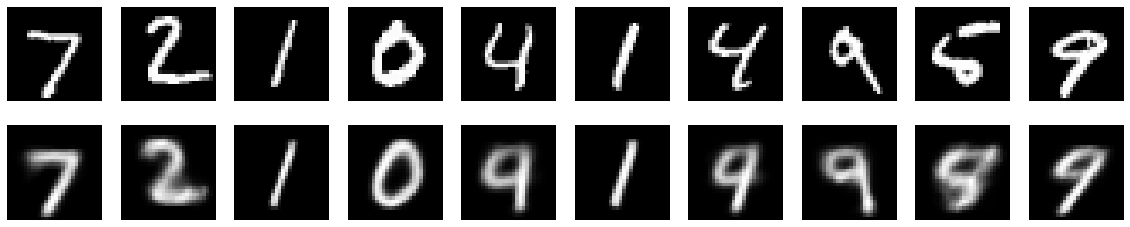

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 393us/step - loss: 1.2184 - val_loss: 1.2662
Epoch 2/10
60000/60000 [==============================] - 14s 229us/step - loss: 1.2252 - val_loss: 1.3478
Epoch 3/10
60000/60000 [==============================] - 14s 231us/step - loss: 1.2267 - val_loss: 1.3321
Epoch 4/10
60000/60000 [==============================] - 14s 229us/step - loss: 1.2267 - val_loss: 1.2536
Epoch 5/10
60000/60000 [==============================] - 14s 236us/step - loss: 1.2246 - val_loss: 1.3345
Epoch 6/10
60000/60000 [==============================] - 14s 236us/step - loss: 1.2293 - val_loss: 1.3515
Epoch 7/10
60000/60000 [==============================] - 14s 225us/step - loss: 1.2243 - val_loss: 1.1315
Epoch 8/10
60000/60000 [==============================] - 13s 222us/step - loss: 1.2411 - val_loss: 1.3218
Epoch 9/10
60000/60000 [==============================] - 13s 222us/step - loss: 1.2190 - va

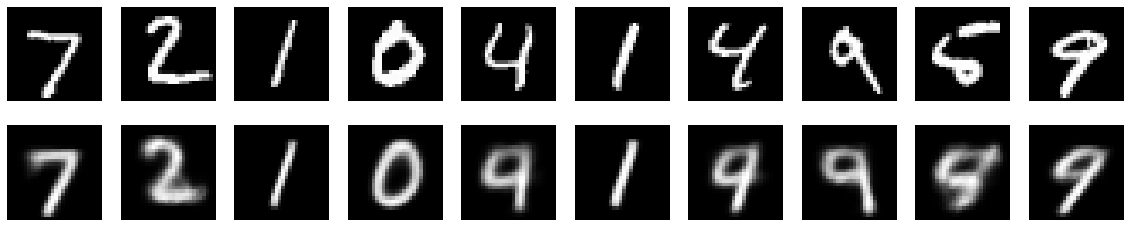

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 422us/step - loss: 1.3314 - val_loss: 1.4784
Epoch 2/10
60000/60000 [==============================] - 16s 260us/step - loss: 1.3353 - val_loss: 1.4715
Epoch 3/10
60000/60000 [==============================] - 16s 261us/step - loss: 1.3555 - val_loss: 1.3078
Epoch 4/10
60000/60000 [==============================] - 15s 256us/step - loss: 1.3338 - val_loss: 1.4575
Epoch 5/10
60000/60000 [==============================] - 15s 257us/step - loss: 1.3322 - val_loss: 1.4563
Epoch 6/10
60000/60000 [==============================] - 16s 266us/step - loss: 1.3359 - val_loss: 1.4734
Epoch 7/10
60000/60000 [==============================] - 15s 257us/step - loss: 1.3259 - val_loss: 1.4695
Epoch 8/10
60000/60000 [==============================] - 15s 255us/step - loss: 1.3357 - val_loss: 1.3065
Epoch 9/10
60000/60000 [==============================] - 15s 251us/step - loss: 1.3383 - va

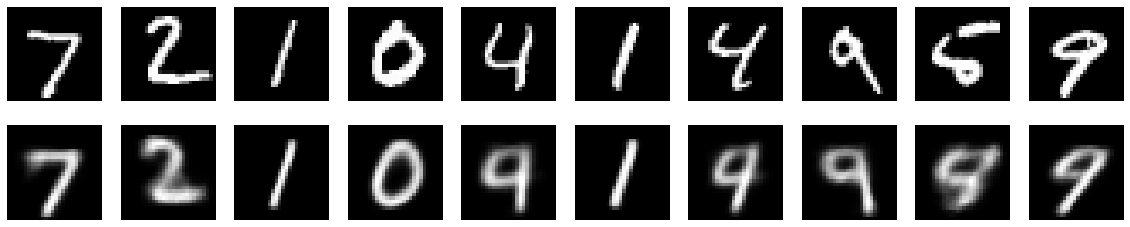

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 433us/step - loss: 1.4507 - val_loss: 1.6235
Epoch 2/10
60000/60000 [==============================] - 13s 220us/step - loss: 1.4574 - val_loss: 1.4267
Epoch 3/10
60000/60000 [==============================] - 13s 224us/step - loss: 1.4454 - val_loss: 1.5536
Epoch 4/10
60000/60000 [==============================] - 14s 227us/step - loss: 1.4493 - val_loss: 1.4881
Epoch 5/10
60000/60000 [==============================] - 14s 236us/step - loss: 1.4446 - val_loss: 1.4766
Epoch 6/10
60000/60000 [==============================] - 13s 225us/step - loss: 1.4427 - val_loss: 1.5117
Epoch 7/10
60000/60000 [==============================] - 14s 226us/step - loss: 1.4382 - val_loss: 1.5713
Epoch 8/10
60000/60000 [==============================] - 14s 225us/step - loss: 1.4449 - val_loss: 1.5398
Epoch 9/10
60000/60000 [==============================] - 13s 222us/step - loss: 1.4478 - va

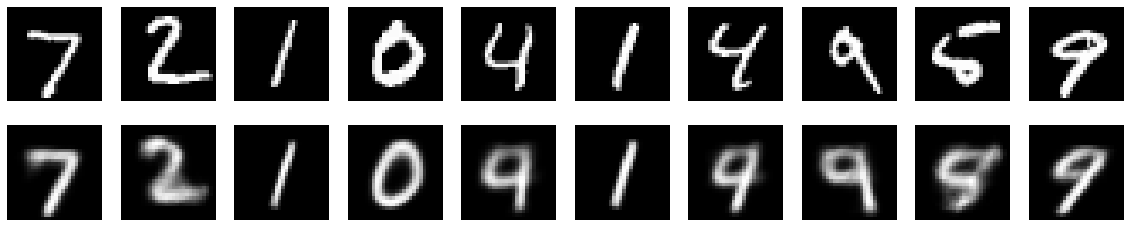

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 398us/step - loss: 1.5575 - val_loss: 1.4795
Epoch 2/10
60000/60000 [==============================] - 13s 221us/step - loss: 1.5513 - val_loss: 1.7412
Epoch 3/10
60000/60000 [==============================] - 13s 221us/step - loss: 1.5477 - val_loss: 1.7332
Epoch 4/10
60000/60000 [==============================] - 13s 219us/step - loss: 1.5596 - val_loss: 1.6493
Epoch 5/10
60000/60000 [==============================] - 14s 228us/step - loss: 1.5535 - val_loss: 1.6022
Epoch 6/10
60000/60000 [==============================] - 13s 224us/step - loss: 1.5481 - val_loss: 1.6711
Epoch 7/10
60000/60000 [==============================] - 13s 222us/step - loss: 1.5606 - val_loss: 1.6379
Epoch 8/10
60000/60000 [==============================] - 13s 222us/step - loss: 1.5536 - val_loss: 1.7147
Epoch 9/10
60000/60000 [==============================] - 13s 220us/step - loss: 1.5596 - va

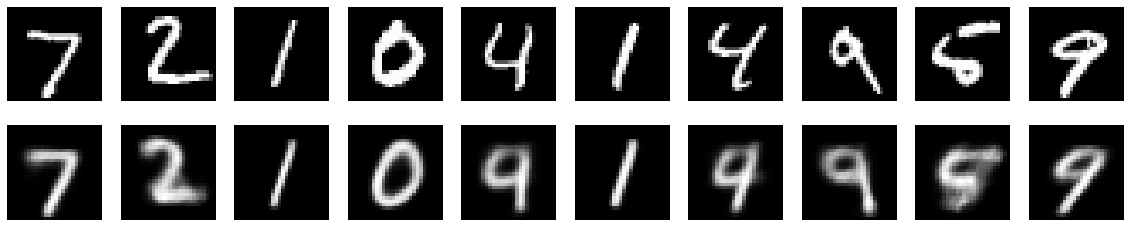

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 414us/step - loss: 1.6628 - val_loss: 1.7971
Epoch 2/10
60000/60000 [==============================] - 13s 217us/step - loss: 1.6730 - val_loss: 1.9256
Epoch 3/10
60000/60000 [==============================] - 13s 218us/step - loss: 1.6672 - val_loss: 1.6369
Epoch 4/10
60000/60000 [==============================] - 13s 218us/step - loss: 1.6705 - val_loss: 1.7273
Epoch 5/10
60000/60000 [==============================] - 13s 223us/step - loss: 1.6616 - val_loss: 1.6388
Epoch 6/10
60000/60000 [==============================] - 14s 226us/step - loss: 1.6640 - val_loss: 1.6799
Epoch 7/10
60000/60000 [==============================] - 13s 216us/step - loss: 1.6715 - val_loss: 1.8315
Epoch 8/10
60000/60000 [==============================] - 13s 215us/step - loss: 1.6568 - val_loss: 1.7537
Epoch 9/10
60000/60000 [==============================] - 13s 214us/step - loss: 1.6672 - va

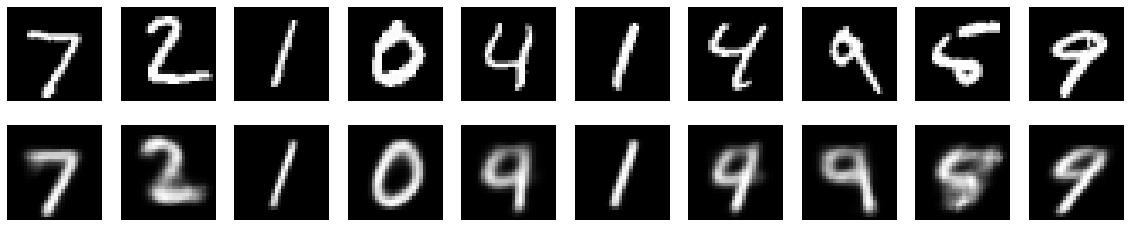

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 400us/step - loss: 1.7660 - val_loss: 1.8848
Epoch 2/10
60000/60000 [==============================] - 12s 193us/step - loss: 1.7696 - val_loss: 1.9809
Epoch 3/10
60000/60000 [==============================] - 12s 196us/step - loss: 1.7826 - val_loss: 1.9019
Epoch 4/10
60000/60000 [==============================] - 12s 196us/step - loss: 1.7857 - val_loss: 2.0627
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 1.7681 - val_loss: 1.7490
Epoch 6/10
60000/60000 [==============================] - 12s 196us/step - loss: 1.7653 - val_loss: 1.8385
Epoch 7/10
60000/60000 [==============================] - 12s 204us/step - loss: 1.7813 - val_loss: 1.9159
Epoch 8/10
60000/60000 [==============================] - 12s 193us/step - loss: 1.7659 - val_loss: 1.8328
Epoch 9/10
60000/60000 [==============================] - 12s 194us/step - loss: 1.7755 - va

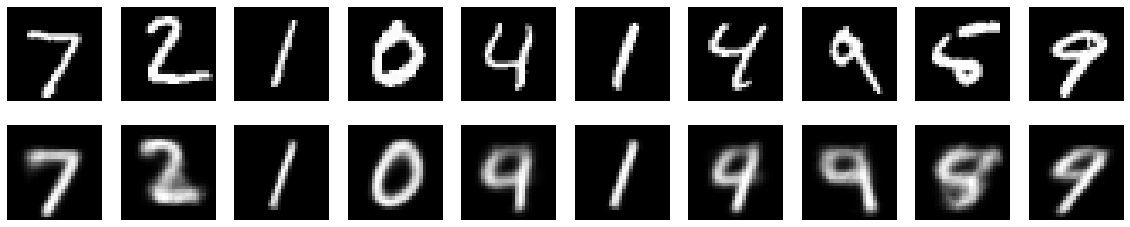

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 411us/step - loss: 1.8817 - val_loss: 2.0760
Epoch 2/10
60000/60000 [==============================] - 12s 198us/step - loss: 1.8810 - val_loss: 2.1608
Epoch 3/10
60000/60000 [==============================] - 12s 196us/step - loss: 1.8827 - val_loss: 1.9681
Epoch 4/10
60000/60000 [==============================] - 12s 197us/step - loss: 1.8917 - val_loss: 2.0995
Epoch 5/10
60000/60000 [==============================] - 12s 198us/step - loss: 1.8817 - val_loss: 2.2475
Epoch 6/10
60000/60000 [==============================] - 12s 197us/step - loss: 1.8881 - val_loss: 1.9797
Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 1.8884 - val_loss: 1.8168
Epoch 8/10
60000/60000 [==============================] - 13s 212us/step - loss: 1.8743 - val_loss: 2.1102
Epoch 9/10
60000/60000 [==============================] - 12s 200us/step - loss: 1.8825 - va

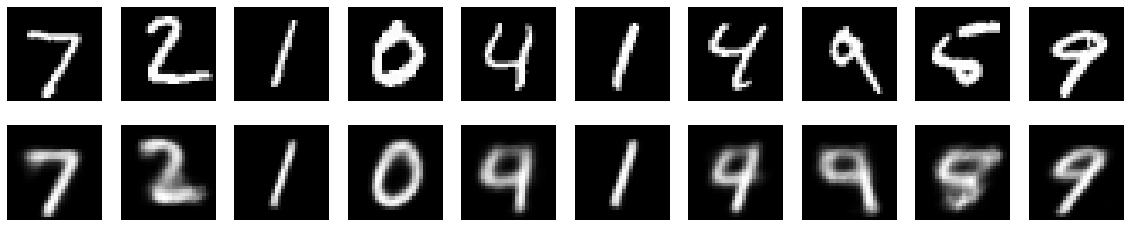

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 404us/step - loss: 1.9946 - val_loss: 2.0243
Epoch 2/10
60000/60000 [==============================] - 12s 194us/step - loss: 2.0089 - val_loss: 2.0539
Epoch 3/10
60000/60000 [==============================] - 12s 195us/step - loss: 1.9949 - val_loss: 2.1139
Epoch 4/10
60000/60000 [==============================] - 12s 195us/step - loss: 1.9934 - val_loss: 2.2458
Epoch 5/10
60000/60000 [==============================] - 12s 194us/step - loss: 1.9919 - val_loss: 2.1349
Epoch 6/10
60000/60000 [==============================] - 12s 195us/step - loss: 1.9865 - val_loss: 2.2173
Epoch 7/10
60000/60000 [==============================] - 12s 194us/step - loss: 2.0054 - val_loss: 2.2401
Epoch 8/10
60000/60000 [==============================] - 12s 193us/step - loss: 1.9827 - val_loss: 2.1511
Epoch 9/10
60000/60000 [==============================] - 12s 198us/step - loss: 1.9859 - va

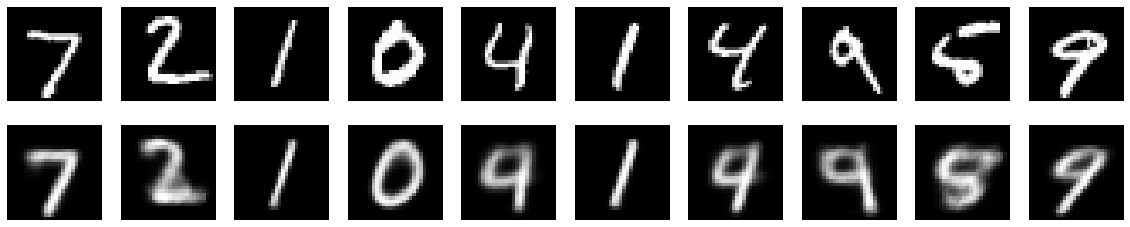

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 385us/step - loss: 2.1078 - val_loss: 2.2931
Epoch 2/10
60000/60000 [==============================] - 12s 195us/step - loss: 2.0979 - val_loss: 2.2503
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 2.1033 - val_loss: 2.3314
Epoch 4/10
60000/60000 [==============================] - 12s 193us/step - loss: 2.0883 - val_loss: 2.0422
Epoch 5/10
60000/60000 [==============================] - 12s 194us/step - loss: 2.0937 - val_loss: 2.0443
Epoch 6/10
60000/60000 [==============================] - 12s 194us/step - loss: 2.0940 - val_loss: 2.2717
Epoch 7/10
60000/60000 [==============================] - 12s 194us/step - loss: 2.0859 - val_loss: 2.2579
Epoch 8/10
60000/60000 [==============================] - 12s 193us/step - loss: 2.0929 - val_loss: 2.2770
Epoch 9/10
60000/60000 [==============================] - 12s 194us/step - loss: 2.0951 - va

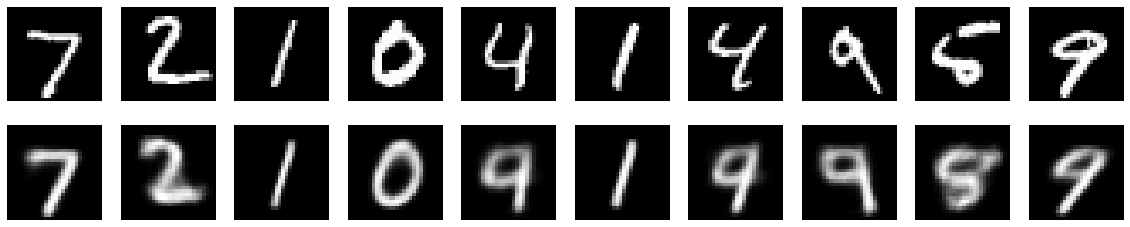

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 397us/step - loss: 2.1905 - val_loss: 2.3317
Epoch 2/10
60000/60000 [==============================] - 12s 196us/step - loss: 2.1996 - val_loss: 2.4979
Epoch 3/10
60000/60000 [==============================] - 12s 198us/step - loss: 2.2069 - val_loss: 2.2698
Epoch 4/10
60000/60000 [==============================] - 12s 195us/step - loss: 2.2125 - val_loss: 2.4291
Epoch 5/10
60000/60000 [==============================] - 12s 197us/step - loss: 2.2107 - val_loss: 2.3615
Epoch 6/10
60000/60000 [==============================] - 12s 196us/step - loss: 2.1978 - val_loss: 2.3673
Epoch 7/10
60000/60000 [==============================] - 12s 199us/step - loss: 2.1998 - val_loss: 2.2542
Epoch 8/10
60000/60000 [==============================] - 12s 198us/step - loss: 2.1901 - val_loss: 2.1876
Epoch 9/10
60000/60000 [==============================] - 12s 199us/step - loss: 2.1881 - va

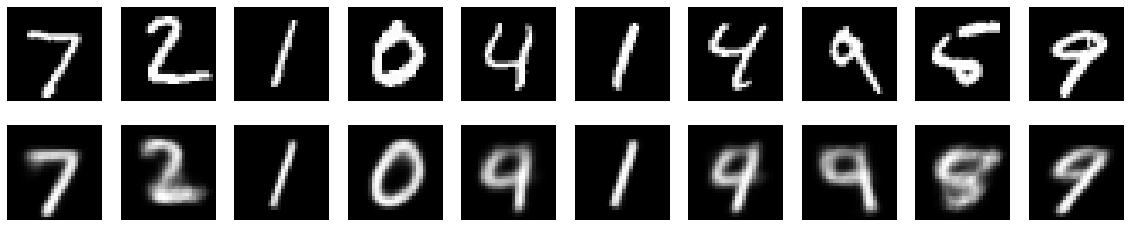

 
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 418us/step - loss: 2.1954 - val_loss: 2.3649
Epoch 2/10
60000/60000 [==============================] - 12s 200us/step - loss: 2.2217 - val_loss: 2.3649
Epoch 3/10
60000/60000 [==============================] - 12s 206us/step - loss: 2.2024 - val_loss: 2.3649
Epoch 4/10
60000/60000 [==============================] - 13s 209us/step - loss: 2.2003 - val_loss: 2.3649
Epoch 5/10
60000/60000 [==============================] - 13s 209us/step - loss: 2.2083 - val_loss: 2.3649
Epoch 6/10
60000/60000 [==============================] - 13s 209us/step - loss: 2.2148 - val_loss: 2.3649
Epoch 7/10
60000/60000 [==============================] - 13s 210us/step - loss: 2.2130 - val_loss: 2.3649
Epoch 8/10
60000/60000 [==============================] - 13s 210us/step - loss: 2.2173 - val_loss: 2.3649
Epoch 9/10
60000/60000 [==============================] - 12s 207us/step - loss: 2.2041 - va

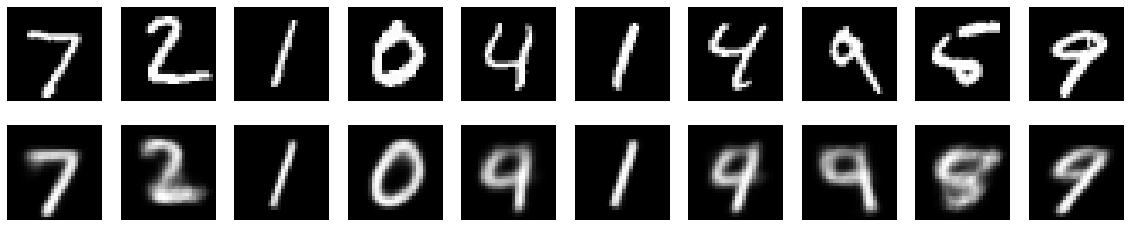

In [84]:
alphas = np.linspace(0, 1, 20)
t = 10
losses = []
models = []

for alpha in alphas:
    loss = rae_loss(alpha, t, 'binary')
    autoencoder.compile(optimizer='adam', loss=loss)
    models.append(autoencoder)
    
    autoencoder.fit(X_train, X_train,
                    epochs=10,
                    batch_size=128,
                    shuffle=True, 
                    validation_data=(X_test, X_test))
    
    print('Alpha {}'.format(alpha))
    
    plot_digits(10, X_test, autoencoder.predict(X_test))
    print(' ')

#